In [1]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
import scipy.stats as st
from natsort import natsorted, index_natsorted

import pandas as pd
import numpy as np
import json
import glob
import os
pd.options.display.float_format = '{:,.4f}'.format

plt.rcParams["font.family"] = "Times New Roman"
plt.rc('legend',fontsize=32)
plt.rc('axes', labelsize=32) 
if not os.path.exists('figs'): os.mkdir("figs")

In [2]:
model_names = [
               'AE_sound_all', 
               'AE_sound_FiLM_one_hot',
               'AE_sound_FiLM_embed_64',
            ]

In [3]:
def get_results_print(model_name, context="",  n=3):
    if context:
        iter_files = glob.glob("results/{}/{}/results_checkpoint_{}_{}_iter_*.json".format(model_name, context, model_name, context))
    else:
        iter_files = glob.glob("results/{}/results_checkpoint_{}__iter_*.json".format(model_name, model_name))
    assert len(iter_files)==n
    iters_results_df = []
    for iter_file in iter_files:
        with open(iter_file) as iter_f:
            iter_file_json = json.load(iter_f)
            context_keys = sorted(list(dict(iter_file_json).keys()))
            results_dict = dict()
            for key in context_keys:
                results_dict[key] = iter_file_json[key]["PR-AUC"] 
            results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=[model_name])
            iters_results_df.append(results_df)
    mean =  pd.concat(iters_results_df).groupby(level=0).mean()
    se = pd.concat(iters_results_df).groupby(level=0).sem()
    ci = st.t.interval(alpha=0.95, df=n-1, loc=mean, scale=se)
    ci_either = (mean- ci[0])[model_name].apply(lambda x: "{:.3f}".format(x))
    mean  = mean[model_name].apply(lambda x: "{:.3f}".format(x))
    results = pd.DataFrame(mean+"±"+ci_either)
    return results.sort_index(key=lambda x: index_natsorted(results_df.index))
    

def get_results_no_window_print(model_name,  n=3):
    iter_files = glob.glob("results/{}/no_window_results_checkpoint_{}__iter_*.json".format(model_name, model_name))
    assert len(iter_files)==n
    iters_results_df = []
    for iter_file in iter_files:
        with open(iter_file) as iter_f:
            iter_file_json = json.load(iter_f)
            context_keys = sorted(list(dict(iter_file_json).keys()))
            results_dict = dict()
            for key in context_keys:
                results_dict[key] = iter_file_json[key]["PR-AUC"] 
            results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=[model_name])
            iters_results_df.append(results_df)

    mean =  pd.concat(iters_results_df).groupby(level=0).mean().round(3)
    se = pd.concat(iters_results_df).groupby(level=0).sem()
    ci = st.t.interval(alpha=0.95, df=n-1, loc=mean, scale=se)
    ci_either = (mean- ci[0])[model_name].apply(lambda x: "{:.3f}".format(x))
    mean  = mean[model_name].apply(lambda x: "{:.3f}".format(x))
    results = pd.DataFrame(mean+"±"+ci_either)
    return results.sort_index(key=lambda x: index_natsorted(results_df.index))

def get_results_oracle_print(model_name,  n=3):
    iter_files = glob.glob("results/{}/oracle_results_checkpoint_{}__iter_*.json".format(model_name, model_name))
    assert len(iter_files)==n
    iters_results_df = []
    for iter_file in iter_files:
        with open(iter_file) as iter_f:
            iter_file_json = json.load(iter_f)
            context_keys = sorted(list(dict(iter_file_json).keys()))
            results_dict = dict()
            for key in context_keys:
                results_dict[key] = iter_file_json[key]["PR-AUC"] 
            results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=[model_name])
            iters_results_df.append(results_df)

    mean =  pd.concat(iters_results_df).groupby(level=0).mean()
    se = pd.concat(iters_results_df).groupby(level=0).sem()
    ci = st.t.interval(alpha=0.95, df=n-1, loc=mean, scale=se)
    
    ci_either = (mean- ci[0])[model_name].apply(lambda x: "{:.3f}".format(x))
    mean  = mean[model_name].apply(lambda x: "{:.3f}".format(x))
    results = pd.DataFrame(mean+"±"+ci_either)
    return results.sort_index(key=lambda x: index_natsorted(results_df.index))

results_list_print = []
for model_name in model_names:
    print(model_name)
    results_list_print.append(get_results_print(model_name))

results_list_print.append(get_results_no_window_print("AE_sound_FiLM_embed_64").rename(columns={"AE_sound_FiLM_embed_64": "AE_sound_FiLM_embed_64_no_window"}))
results_df_print = pd.concat(results_list_print, axis=1)
results_df_print

AE_sound_all
AE_sound_FiLM_one_hot
AE_sound_FiLM_embed_64


,AE_sound_all,AE_sound_FiLM_one_hot,AE_sound_FiLM_embed_64,AE_sound_FiLM_embed_64_no_window
fan_0_0dB,0.521±0.051,0.523±0.057,0.541±0.037,0.552±0.037
fan_0_6dB,0.644±0.047,0.719±0.083,0.733±0.027,0.745±0.027
fan_0_min6dB,0.518±0.036,0.510±0.035,0.519±0.026,0.518±0.023
fan_1_0dB,0.670±0.135,0.848±0.024,0.856±0.015,0.814±0.064
fan_1_6dB,0.913±0.030,0.947±0.038,0.935±0.033,0.939±0.022
fan_1_min6dB,0.485±0.026,0.622±0.031,0.628±0.034,0.542±0.023
fan_2_0dB,0.614±0.014,0.663±0.017,0.662±0.061,0.677±0.036
fan_2_6dB,0.847±0.034,0.858±0.028,0.846±0.034,0.890±0.010
fan_2_min6dB,0.431±0.011,0.445±0.014,0.457±0.034,0.461±0.023
fan_3_0dB,0.704±0.196,0.892±0.030,0.949±0.078,0.825±0.019


In [4]:
single_model_list_print = []
for i in range(16):
    single_model_list_print.append(get_results_print("AE_sound", context=str(i)))

single_model_results_print = pd.concat(single_model_list_print)
cande_oracle_results_print = get_results_oracle_print("AE_sound_FiLM_embed_64").rename(columns={"AE_sound_FiLM_embed_64": "AE_sound_FiLM_embed_64_oracle"})
oracle_results_df = pd.concat([single_model_results_print, cande_oracle_results_print], axis=1)
oracle_results_df 

,AE_sound,AE_sound_FiLM_embed_64_oracle
fan_0_0dB,0.564±0.028,0.548±0.038
fan_0_6dB,0.783±0.013,0.741±0.029
fan_0_min6dB,0.540±0.012,0.518±0.028
fan_1_0dB,0.816±0.113,0.869±0.014
fan_1_6dB,0.963±0.011,0.941±0.030
fan_1_min6dB,0.593±0.013,0.631±0.037
fan_2_0dB,0.682±0.018,0.670±0.063
fan_2_6dB,0.912±0.007,0.890±0.028
fan_2_min6dB,0.462±0.007,0.458±0.034
fan_3_0dB,0.963±0.007,0.983±0.031


In [5]:
def get_results(model_name, context=""):
    if context:
        iter_files = glob.glob("results/{}/{}/results_checkpoint_{}_{}_iter_*.json".format(model_name, context, model_name, context))
    else:
        iter_files = glob.glob("results/{}/results_checkpoint_{}__iter_*.json".format(model_name, model_name))
    assert len(iter_files)==3
    iters_results_df = []
    for iter_file in iter_files:
        with open(iter_file) as iter_f:
            iter_file_json = json.load(iter_f)
            context_keys = sorted(list(dict(iter_file_json).keys()))
            results_dict = dict()
            for key in context_keys:
                results_dict[key] = iter_file_json[key]["PR-AUC"] 
            results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=[model_name])
            iters_results_df.append(results_df)
    return pd.concat(iters_results_df).groupby(level=0).mean()
def get_results_no_window(model_name):

    iter_files = glob.glob("results/{}/no_window_results_checkpoint_{}__iter_*.json".format(model_name, model_name))
    assert len(iter_files)==3
    iters_results_df = []
    for iter_file in iter_files:
        with open(iter_file) as iter_f:
            iter_file_json = json.load(iter_f)
            context_keys = sorted(list(dict(iter_file_json).keys()))
            results_dict = dict()
            for key in context_keys:
                results_dict[key] = iter_file_json[key]["PR-AUC"] 
            results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=[model_name])
            iters_results_df.append(results_df)
    return pd.concat(iters_results_df).groupby(level=0).mean()

def get_results_oracle(model_name):

    iter_files = glob.glob("results/{}/oracle_results_checkpoint_{}__iter_*.json".format(model_name, model_name))
    assert len(iter_files)==3
    iters_results_df = []
    for iter_file in iter_files:
        with open(iter_file) as iter_f:
            iter_file_json = json.load(iter_f)
            context_keys = sorted(list(dict(iter_file_json).keys()))
            results_dict = dict()
            for key in context_keys:
                results_dict[key] = iter_file_json[key]["PR-AUC"] 
            results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=[model_name])
            iters_results_df.append(results_df)
    return pd.concat(iters_results_df).groupby(level=0).mean()

results_list = []
for model_name in model_names:
    results_list.append(get_results(model_name))
results_list.append(get_results_no_window("AE_sound_FiLM_embed_64").rename(columns={"AE_sound_FiLM_embed_64": "AE_sound_FiLM_embed_64_no_window"}))
results_df = pd.concat(results_list, axis=1)
results_df

,AE_sound_all,AE_sound_FiLM_one_hot,AE_sound_FiLM_embed_64,AE_sound_FiLM_embed_64_no_window
fan_0_0dB,0.5212,0.5233,0.5412,0.5520
fan_0_6dB,0.6441,0.7188,0.7330,0.7446
fan_0_min6dB,0.5178,0.5096,0.5187,0.5176
fan_1_0dB,0.6700,0.8480,0.8559,0.8139
fan_1_6dB,0.9133,0.9471,0.9348,0.9385
fan_1_min6dB,0.4846,0.6215,0.6279,0.5421
fan_2_0dB,0.6144,0.6631,0.6616,0.6769
fan_2_6dB,0.8467,0.8578,0.8465,0.8904
fan_2_min6dB,0.4312,0.4446,0.4575,0.4610
fan_3_0dB,0.7038,0.8922,0.9495,0.8252


In [6]:
with open("machine_ids_map", "r") as f:
    machine_id_map = json.load(f)
inv_machine_id_map = {v: k for k, v in machine_id_map.items()}

single_model_list = []
for i in range(16):
    single_model_list.append(get_results("AE_sound", context=str(i)))

single_model_results = pd.concat(single_model_list)
cande_oracle_results = get_results_oracle("AE_sound_FiLM_embed_64").rename(columns={"AE_sound_FiLM_embed_64": "AE_sound_FiLM_embed_64_oracle"})
oracle_results_df = pd.concat([single_model_results, cande_oracle_results, results_df.AE_sound_FiLM_embed_64], axis=1)
oracle_results_df[["Machine Name", "id", "SNR"]] = pd.DataFrame([x.split('_') for x in oracle_results_df.index.tolist()], index=oracle_results_df.index)
oracle_results_df["ID"] = pd.to_numeric(oracle_results_df["id"])
oracle_results_df["ID"] = oracle_results_df["ID"].map(inv_machine_id_map)
oracle_results_df["ID"] = pd.DataFrame([x.split('_')[-1] for x in oracle_results_df["ID"].tolist()], index=oracle_results_df.index)
oracle_results_df
oracle_results_df 

,AE_sound,AE_sound_FiLM_embed_64_oracle,AE_sound_FiLM_embed_64,Machine Name,id,SNR,ID
fan_0_0dB,0.5636,0.5479,0.5412,fan,0,0dB,00
fan_0_6dB,0.7825,0.7409,0.7330,fan,0,6dB,00
fan_0_min6dB,0.5403,0.5184,0.5187,fan,0,min6dB,00
fan_1_0dB,0.8159,0.8686,0.8559,fan,1,0dB,02
fan_1_6dB,0.9626,0.9414,0.9348,fan,1,6dB,02
fan_1_min6dB,0.5931,0.6314,0.6279,fan,1,min6dB,02
fan_2_0dB,0.6820,0.6696,0.6616,fan,2,0dB,04
fan_2_6dB,0.9124,0.8895,0.8465,fan,2,6dB,04
fan_2_min6dB,0.4617,0.4578,0.4575,fan,2,min6dB,04
fan_3_0dB,0.9631,0.9827,0.9495,fan,3,0dB,06


In [7]:
rank_results_df = results_df.rank(1, ascending=False, method='first')
mean_rank_row = rank_results_df.mean().to_frame().T
mean_rank_row = mean_rank_row.rename(index={0: 'average rank'})
results_and_ranks_df = pd.concat([results_df, mean_rank_row])
results_and_ranks_df

,AE_sound_all,AE_sound_FiLM_one_hot,AE_sound_FiLM_embed_64,AE_sound_FiLM_embed_64_no_window
fan_0_0dB,0.5212,0.5233,0.5412,0.5520
fan_0_6dB,0.6441,0.7188,0.7330,0.7446
fan_0_min6dB,0.5178,0.5096,0.5187,0.5176
fan_1_0dB,0.6700,0.8480,0.8559,0.8139
fan_1_6dB,0.9133,0.9471,0.9348,0.9385
fan_1_min6dB,0.4846,0.6215,0.6279,0.5421
fan_2_0dB,0.6144,0.6631,0.6616,0.6769
fan_2_6dB,0.8467,0.8578,0.8465,0.8904
fan_2_min6dB,0.4312,0.4446,0.4575,0.4610
fan_3_0dB,0.7038,0.8922,0.9495,0.8252


In [8]:
mean_rank_row

,AE_sound_all,AE_sound_FiLM_one_hot,AE_sound_FiLM_embed_64,AE_sound_FiLM_embed_64_no_window
average rank,3.3542,2.2917,2.1458,2.2083


In [9]:
pc_diff_AE_sound_FiLM_embed_64_single= pd.concat([oracle_results_df.AE_sound, results_df.AE_sound_FiLM_embed_64], axis=1).pct_change(axis='columns')
mean_pc_diff_AE_sound_FiLM_embed_64_single = pc_diff_AE_sound_FiLM_embed_64_single.AE_sound_FiLM_embed_64.mean()
std_pc_diff_AE_sound_FiLM_embed_64_single = pc_diff_AE_sound_FiLM_embed_64_single.AE_sound_FiLM_embed_64.std()
print(mean_pc_diff_AE_sound_FiLM_embed_64_single, std_pc_diff_AE_sound_FiLM_embed_64_single)

0.06148320231311873 0.25840143454346887


In [10]:
print(st.wilcoxon(oracle_results_df.AE_sound, results_df.AE_sound_FiLM_embed_64))

WilcoxonResult(statistic=585.0, pvalue=0.9754532564136702)


In [11]:
pc_diff_AE_sound_FiLM_embed_64_oracle = pd.concat([oracle_results_df.AE_sound_FiLM_embed_64_oracle, results_df.AE_sound_FiLM_embed_64], axis=1).pct_change(axis='columns')
mean_pc_diff_AE_sound_FiLM_embed_64_oracle = pc_diff_AE_sound_FiLM_embed_64_oracle.AE_sound_FiLM_embed_64.mean()
std_pc_diff_AE_sound_FiLM_embed_64_oracle = pc_diff_AE_sound_FiLM_embed_64_oracle.AE_sound_FiLM_embed_64.std()
print(mean_pc_diff_AE_sound_FiLM_embed_64_oracle, std_pc_diff_AE_sound_FiLM_embed_64_oracle)

0.02368767412617355 0.19806868421177368


In [12]:
print(st.wilcoxon(oracle_results_df.AE_sound_FiLM_embed_64_oracle, results_df.AE_sound_FiLM_embed_64))

WilcoxonResult(statistic=307.0, pvalue=0.006535800604897193)


In [13]:
with open("machine_ids_map", "r") as f:
    machine_id_map = json.load(f)
inv_machine_id_map = {v: k for k, v in machine_id_map.items()}
results_df[["Machine Name", "id", "SNR"]] = pd.DataFrame([x.split('_') for x in results_and_ranks_df.index.tolist()], index=results_and_ranks_df.index)
results_df["ID"] = pd.to_numeric(results_df["id"])
results_df["ID"] = results_df["ID"].map(inv_machine_id_map)
results_df["ID"] = pd.DataFrame([x.split('_')[-1] for x in results_df["ID"].tolist()], index=results_df.index)
results_df

,AE_sound_all,AE_sound_FiLM_one_hot,AE_sound_FiLM_embed_64,AE_sound_FiLM_embed_64_no_window,Machine Name,id,SNR,ID
fan_0_0dB,0.5212,0.5233,0.5412,0.5520,fan,0,0dB,00
fan_0_6dB,0.6441,0.7188,0.7330,0.7446,fan,0,6dB,00
fan_0_min6dB,0.5178,0.5096,0.5187,0.5176,fan,0,min6dB,00
fan_1_0dB,0.6700,0.8480,0.8559,0.8139,fan,1,0dB,02
fan_1_6dB,0.9133,0.9471,0.9348,0.9385,fan,1,6dB,02
fan_1_min6dB,0.4846,0.6215,0.6279,0.5421,fan,1,min6dB,02
fan_2_0dB,0.6144,0.6631,0.6616,0.6769,fan,2,0dB,04
fan_2_6dB,0.8467,0.8578,0.8465,0.8904,fan,2,6dB,04
fan_2_min6dB,0.4312,0.4446,0.4575,0.4610,fan,2,min6dB,04
fan_3_0dB,0.7038,0.8922,0.9495,0.8252,fan,3,0dB,06


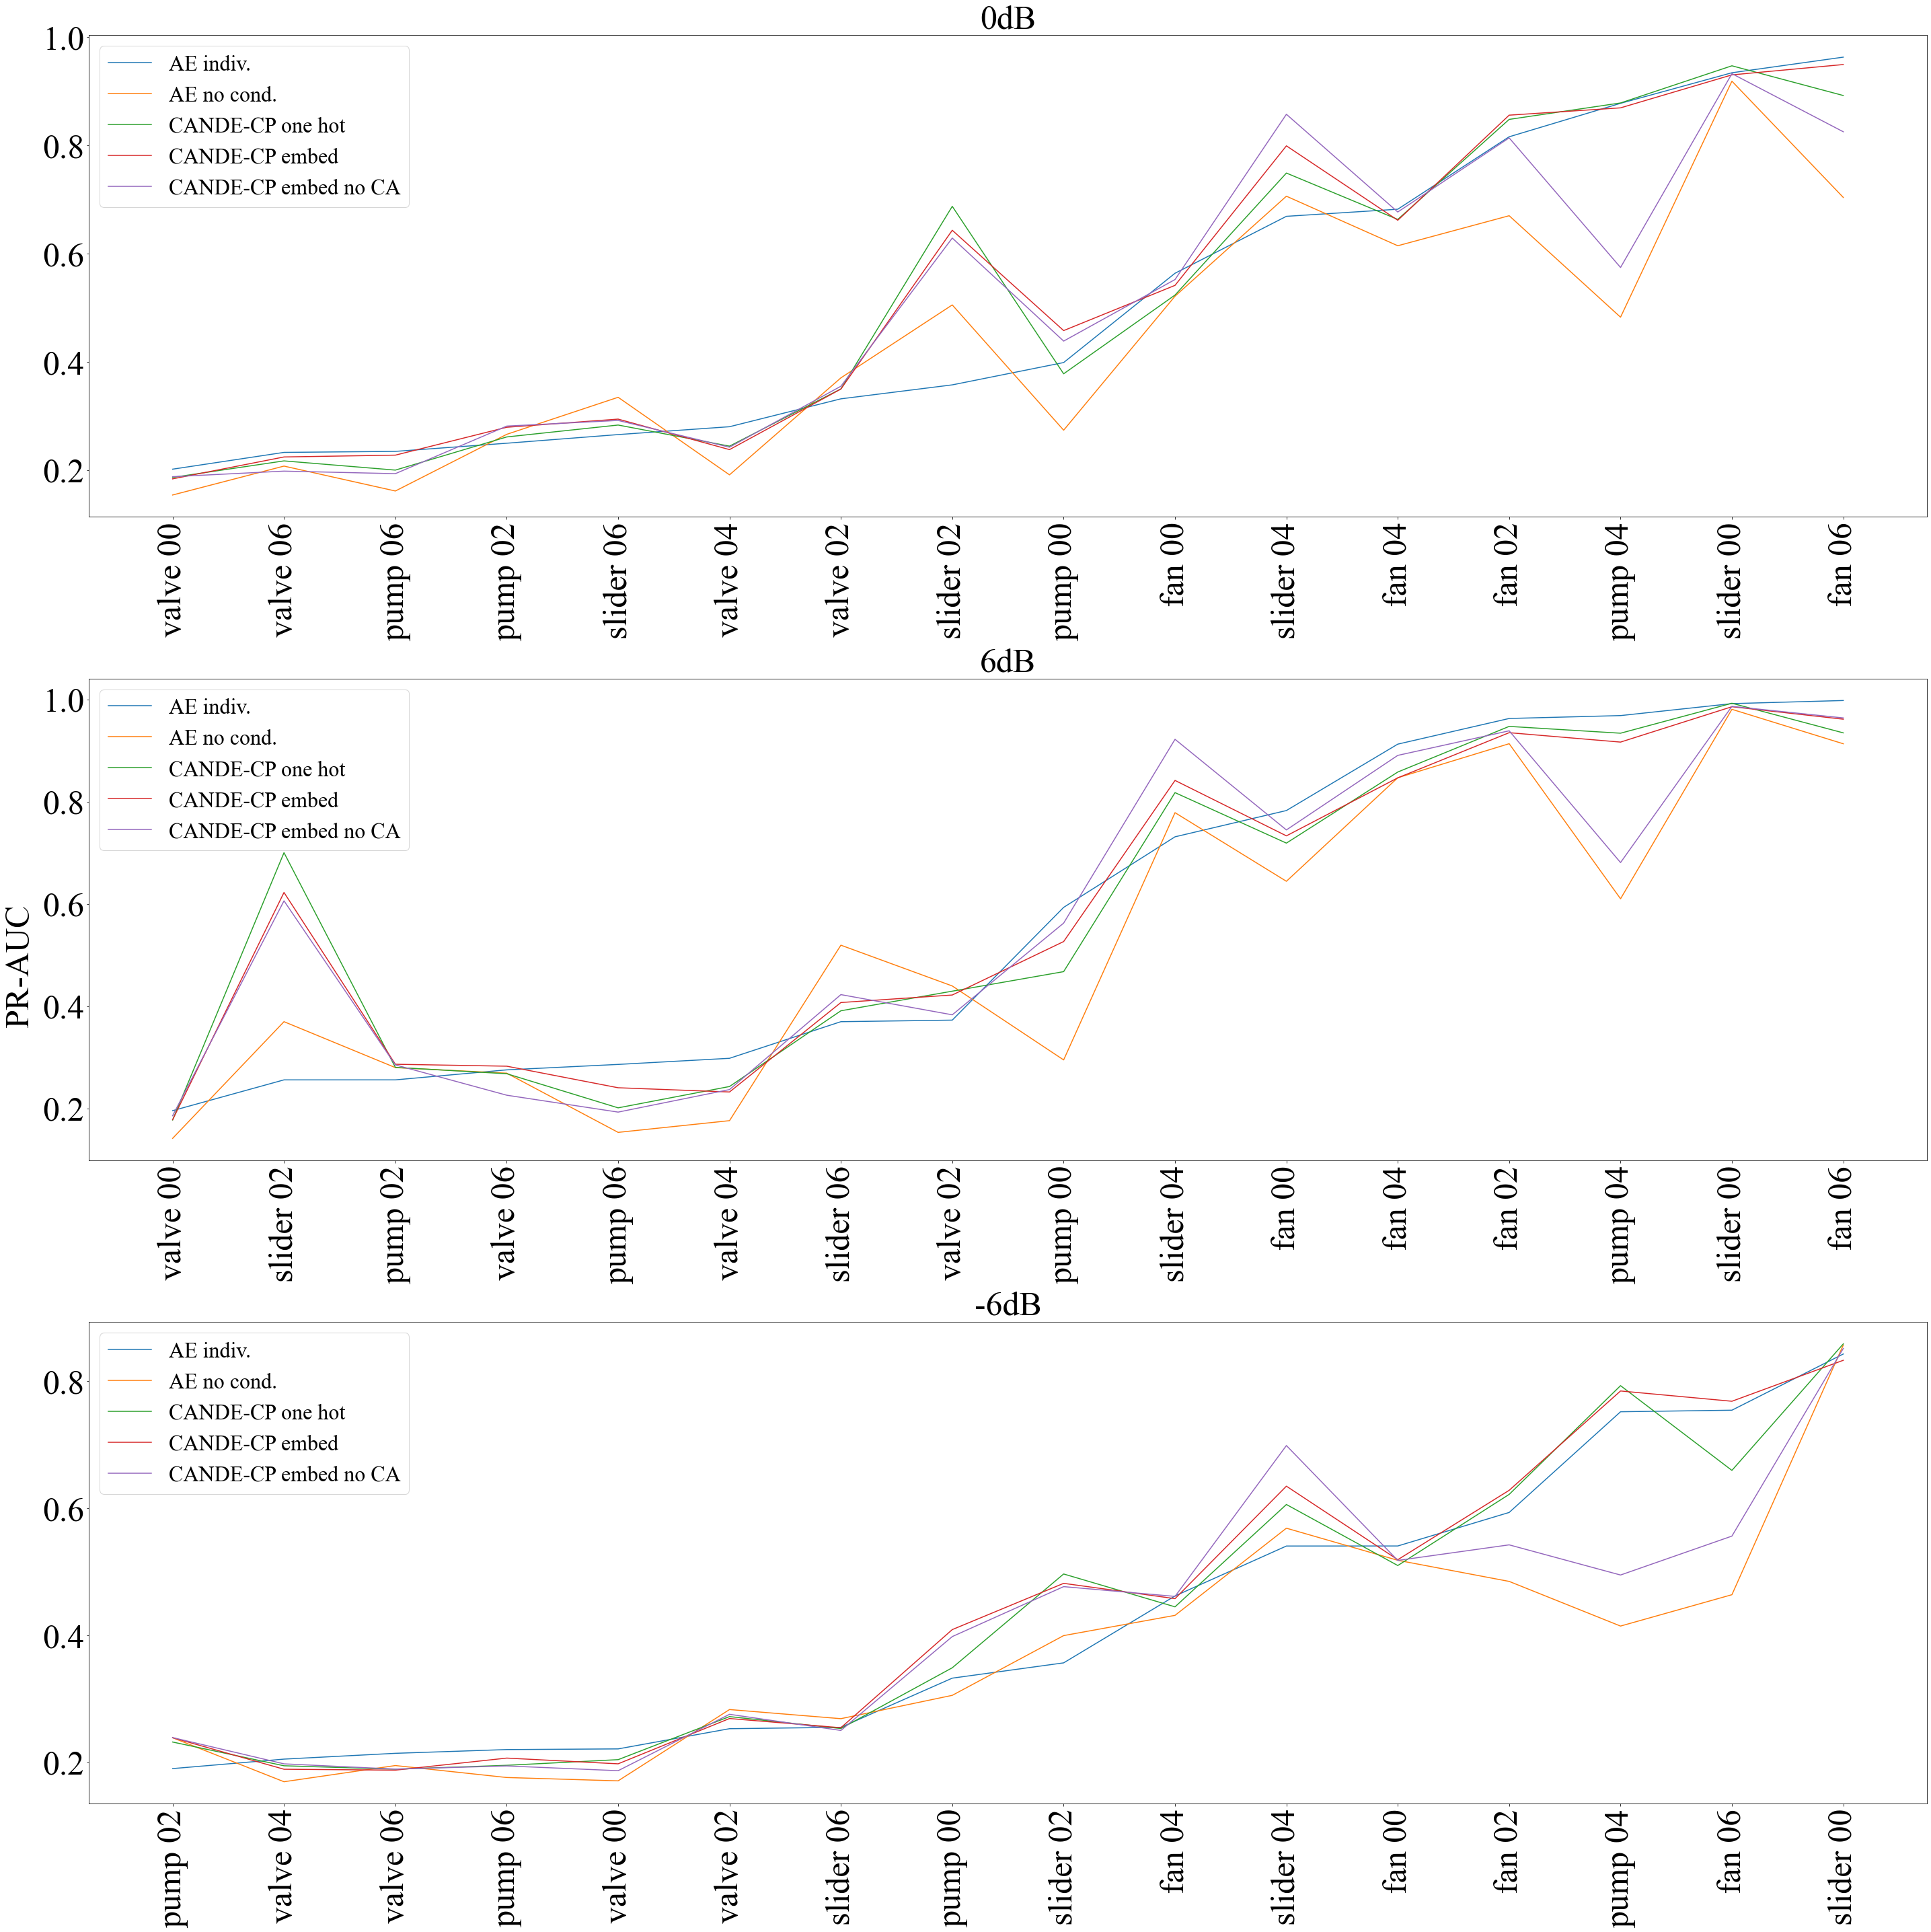

In [14]:


def plot_ax(dB_str, ax, df, cols_to_plot):
    df = df[df.SNR == dB_str]
    df_labels = df["Machine Name"]+' '+df["ID"].astype(str)
    df_labels = [s.replace('min', '-') for s in df_labels ]
    df[cols_to_plot].plot(ax=ax)
    ax.xaxis.set_ticks(range(0,len( df_labels)))
    ax.set_xticklabels(df_labels, rotation=90)
    ax.tick_params(axis='both', which='major', labelsize=50)
    ax.set_title(dB_str.replace('min', '-'), fontsize=50)
    return ax
formatted_col_map_plot= {
            "AE_sound": "AE indiv.", 
           "AE_sound_all": "AE no cond.", 
           "AE_sound_FiLM_one_hot"  :"CANDE-CP one hot",  
           "AE_sound_FiLM_embed_64": "CANDE-CP embed",
           "AE_sound_FiLM_embed_64_no_window": "CANDE-CP embed no CA"
}
cols_to_plot = ["AE indiv.", "AE no cond.","CANDE-CP one hot","CANDE-CP embed","CANDE-CP embed no CA"]

plt_results = pd.concat([results_df,single_model_results], axis=1).sort_values(by="AE_sound")
plt_results = plt_results.rename(columns=formatted_col_map_plot, errors="raise")
plt_results[["Machine Name", "id", "SNR"]] = pd.DataFrame(
        [x.split('_') for x in plt_results.index.tolist()], 
        index=plt_results.index
    )
fig, axs = plt.subplots(3, figsize=(40, 40), sharex=False)
plt_results_ax = axs[0]


ax1 = plot_ax("0dB", axs[0], plt_results, cols_to_plot)
ax2 = plot_ax("6dB", axs[1], plt_results, cols_to_plot)
ax3 = plot_ax("min6dB", axs[2], plt_results, cols_to_plot)

fig.tight_layout(pad=2.0)
fig.supylabel('PR-AUC', fontsize=50, ha='right')
plt.tight_layout(rect=[0, 0, 1, 1])

plt.savefig("figs/CANDE-CP-MIMII-PR-AUC.png",bbox_inches='tight')


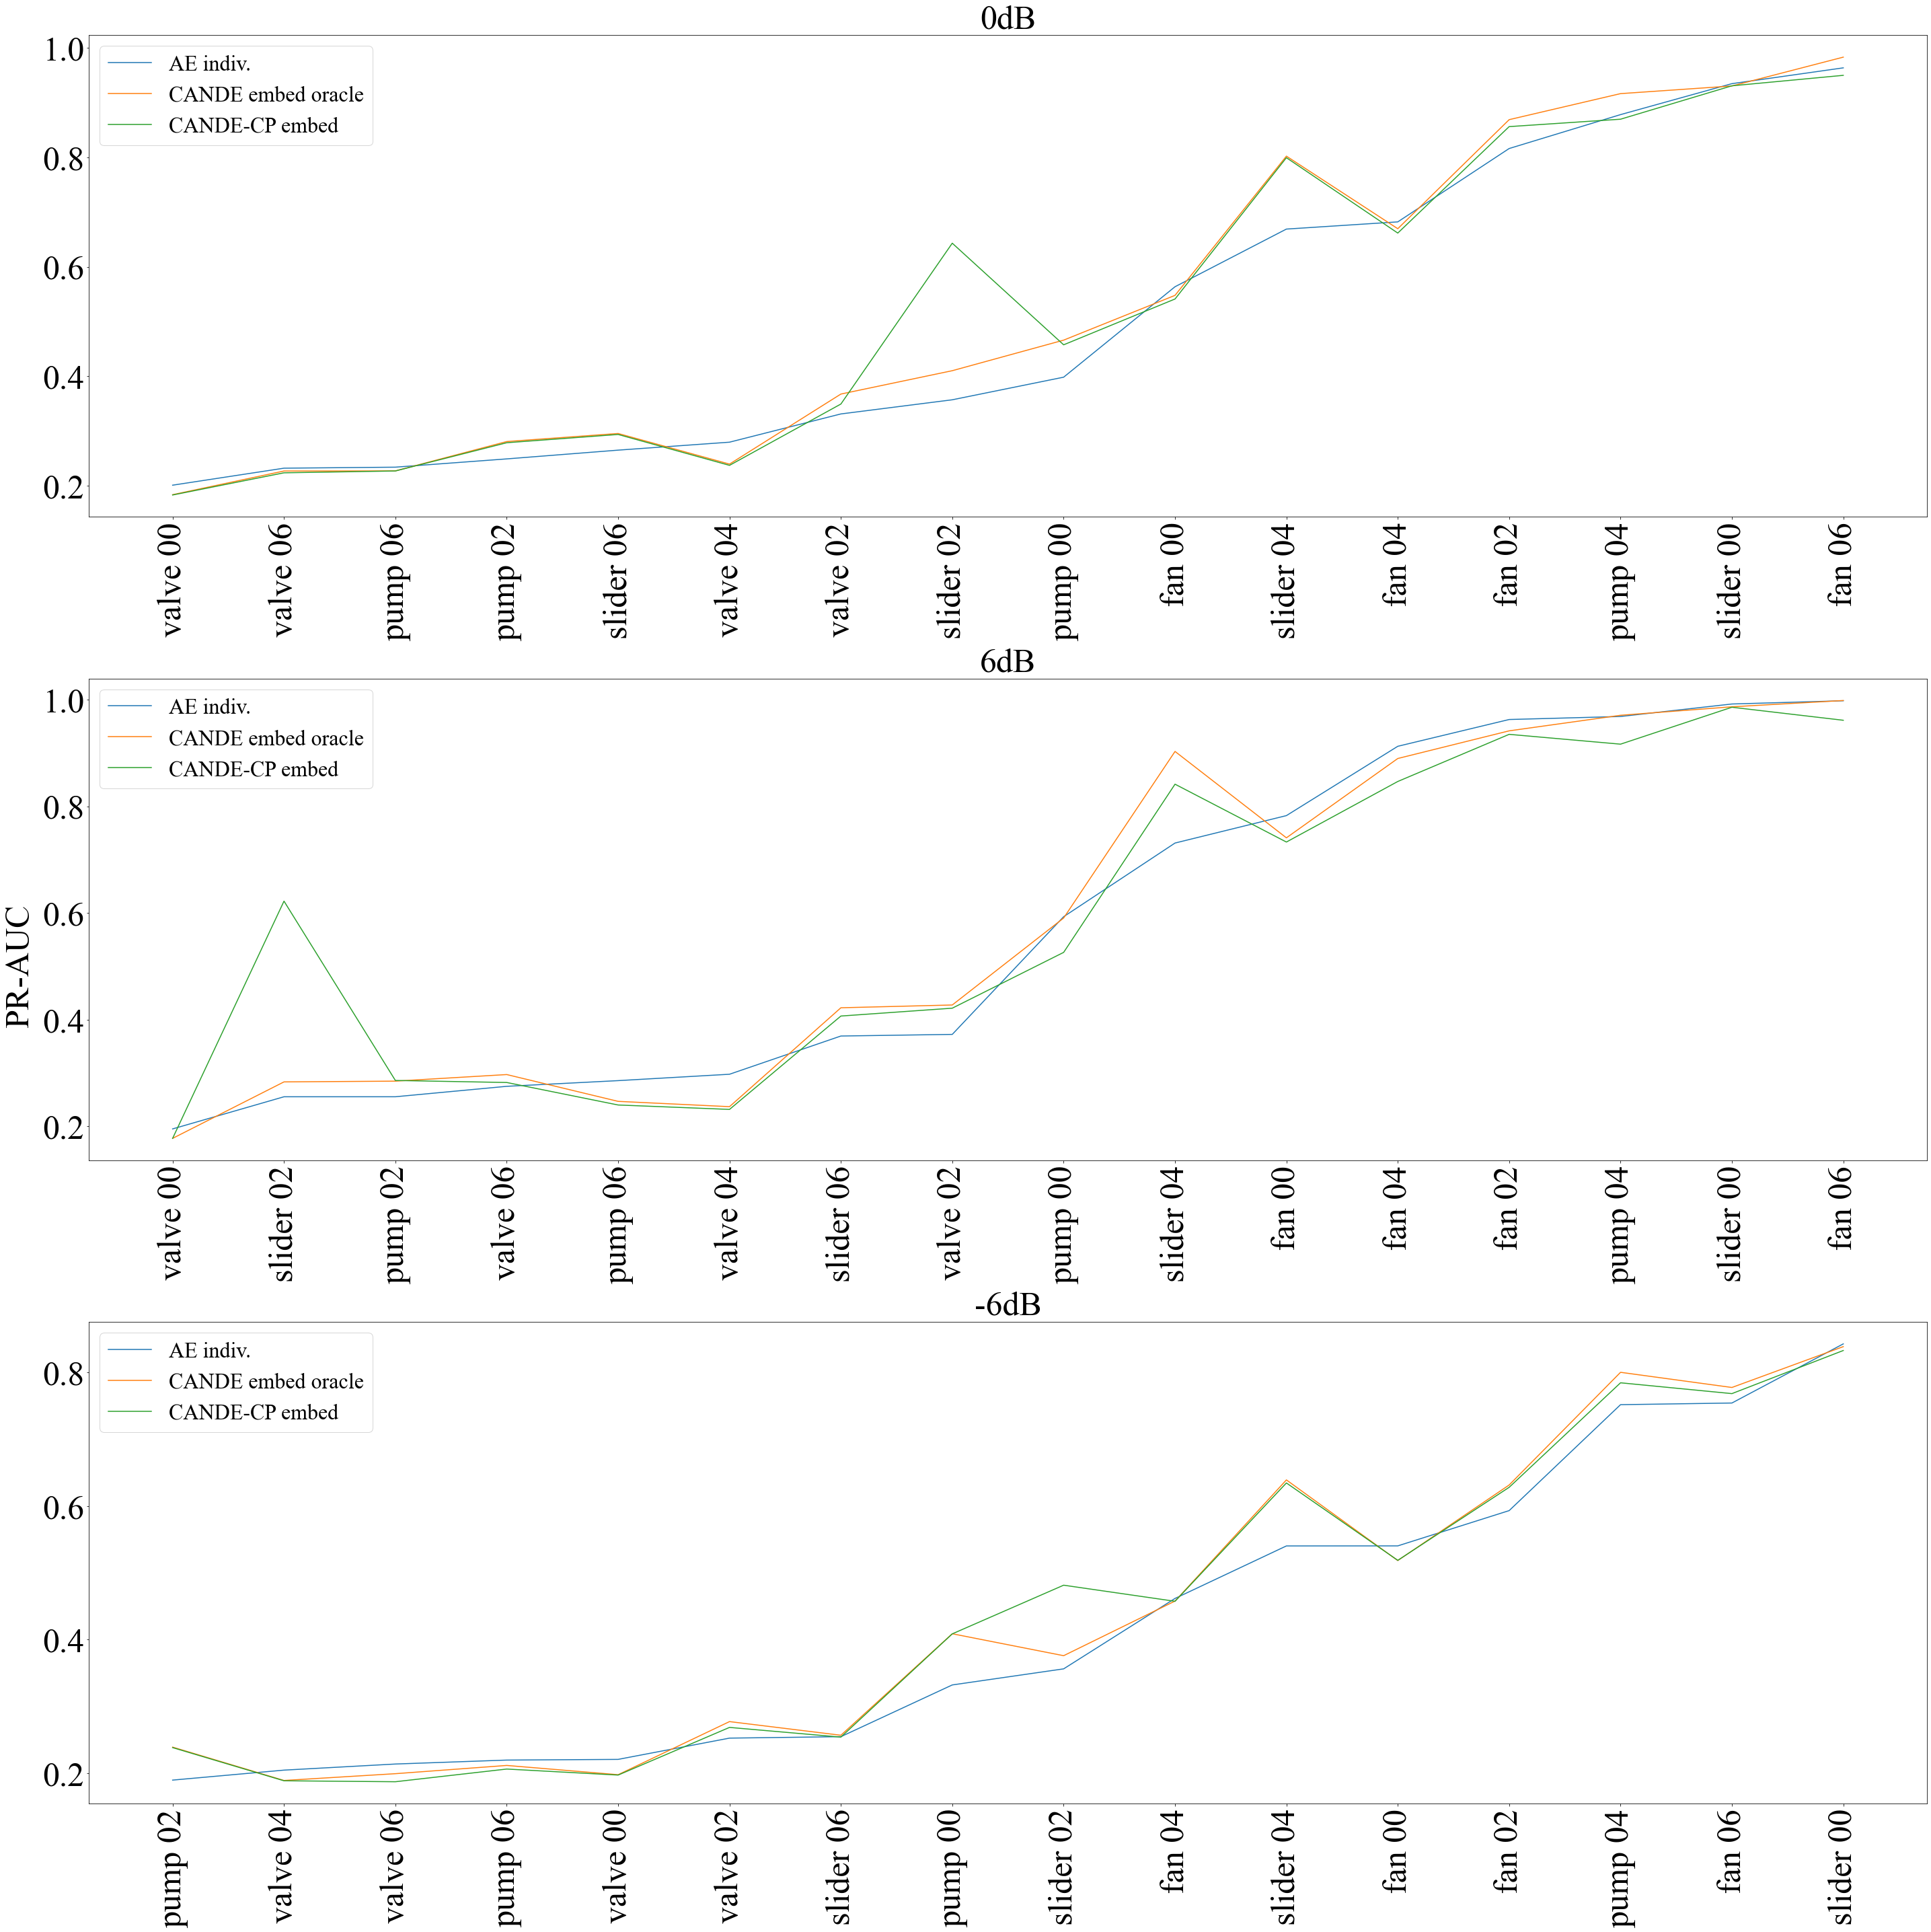

In [15]:
def plot_ax(dB_str, ax, df, cols_to_plot):
    df = df[df.SNR == dB_str]
    df_labels = df["Machine Name"]+' '+df["ID"].astype(str)
    df_labels = [s.replace('min', '-') for s in df_labels ]
    df[cols_to_plot].plot(ax=ax)
    ax.xaxis.set_ticks(range(0,len( df_labels)))
    ax.set_xticklabels(df_labels, rotation=90)
    ax.tick_params(axis='both', which='major', labelsize=50)
    ax.set_title(dB_str.replace('min', '-'), fontsize=50)
    return ax
formatted_col_map_oracle_plot= {
           "AE_sound": "AE indiv.", 
           "AE_sound_FiLM_embed_64_oracle": "CANDE embed oracle",
           "AE_sound_FiLM_embed_64": "CANDE-CP embed",
}
cols_to_plot_oracle = ["AE indiv.", "CANDE embed oracle","CANDE-CP embed"]
plt_oracle_results_df = oracle_results_df.sort_values(by="AE_sound")

plt_oracle_results_df  = plt_oracle_results_df.rename(columns=formatted_col_map_oracle_plot, errors="raise")
plt_oracle_results_df [["Machine Name", "id", "SNR"]] = pd.DataFrame(
    [x.split('_') for x in plt_oracle_results_df.index.tolist()], 
    index=plt_oracle_results_df.index
)
fig, axs = plt.subplots(3, figsize=(40, 40), sharex=False)
plt_oracle_results_ax = axs[0]


ax1 = plot_ax("0dB", axs[0], plt_oracle_results_df, cols_to_plot_oracle)
ax2 = plot_ax("6dB", axs[1], plt_oracle_results_df, cols_to_plot_oracle)
ax3 = plot_ax("min6dB", axs[2], plt_oracle_results_df, cols_to_plot_oracle)

fig.tight_layout(pad=2.0)
fig.supylabel('PR-AUC', fontsize=50, ha='right')
plt.tight_layout(rect=[0, 0, 1, 1])

plt.savefig("figs/CANDE-CP-oracle-MIMII-PR-AUC.png",bbox_inches='tight')

In [16]:
plt_oracle_results_df 

,AE indiv.,CANDE embed oracle,CANDE-CP embed,Machine Name,id,SNR,ID
pump_5_min6dB,0.1900,0.2393,0.2386,pump,5,min6dB,02
valve_12_6dB,0.1953,0.1776,0.1776,valve,12,6dB,00
valve_12_0dB,0.2014,0.1840,0.1835,valve,12,0dB,00
valve_14_min6dB,0.2049,0.1895,0.1890,valve,14,min6dB,04
valve_15_min6dB,0.2141,0.1996,0.1876,valve,15,min6dB,06
pump_7_min6dB,0.2200,0.2119,0.2066,pump,7,min6dB,06
valve_12_min6dB,0.2210,0.1981,0.1975,valve,12,min6dB,00
valve_15_0dB,0.2324,0.2273,0.2240,valve,15,0dB,06
pump_7_0dB,0.2343,0.2274,0.2273,pump,7,0dB,06
pump_5_0dB,0.2494,0.2810,0.2789,pump,5,0dB,02


In [17]:
formatted_col_map= {
           "AE_sound_all": "AE no cond.", 
           "AE_sound_FiLM_one_hot"  :"CANDE-CP one hot",  
           "AE_sound_FiLM_embed_64": "CANDE-CP embed",
           "AE_sound_FiLM_embed_64_no_window": "CANDE-CP embed no CA"
}


results_df_print[["Machine Name", "id", "SNR"]] = pd.DataFrame([x.split('_') for x in results_df_print.index.tolist()], index=results_df_print.index)

results_df_print["ID"] = pd.to_numeric(results_df_print["id"])
results_df_print["ID"] = results_df_print["ID"].map(inv_machine_id_map)

results_df_print["ID"] = pd.DataFrame([x.split('_')[-1] for x in results_df_print["ID"].tolist()], index=results_df_print.index)
formatted_results_ranks_df_print= pd.concat([results_df_print, mean_rank_row])
formatted_results_ranks_df_print= formatted_results_ranks_df_print.rename(columns=formatted_col_map, errors="raise")

formatted_results_ranks_df_print = formatted_results_ranks_df_print[[
    "Machine Name",
    "ID",
    "SNR",
    "AE no cond.", 
    "CANDE-CP one hot", 
    'CANDE-CP embed no CA',
    "CANDE-CP embed"
]]


In [18]:

print(formatted_results_ranks_df_print.to_latex( columns=formatted_results_ranks_df_print.columns, index=False))

\begin{tabular}{lllllll}
\toprule
Machine Name &   ID &     SNR &  AE no cond. & CANDE-CP one hot & CANDE-CP embed no CA & CANDE-CP embed \\
\midrule
         fan &   00 &     0dB &  0.521±0.051 &      0.523±0.057 &          0.552±0.037 &    0.541±0.037 \\
         fan &   00 &     6dB &  0.644±0.047 &      0.719±0.083 &          0.745±0.027 &    0.733±0.027 \\
         fan &   00 &  min6dB &  0.518±0.036 &      0.510±0.035 &          0.518±0.023 &    0.519±0.026 \\
         fan &   02 &     0dB &  0.670±0.135 &      0.848±0.024 &          0.814±0.064 &    0.856±0.015 \\
         fan &   02 &     6dB &  0.913±0.030 &      0.947±0.038 &          0.939±0.022 &    0.935±0.033 \\
         fan &   02 &  min6dB &  0.485±0.026 &      0.622±0.031 &          0.542±0.023 &    0.628±0.034 \\
         fan &   04 &     0dB &  0.614±0.014 &      0.663±0.017 &          0.677±0.036 &    0.662±0.061 \\
         fan &   04 &     6dB &  0.847±0.034 &      0.858±0.028 &          0.890±0.010 &    0.846±0.0

In [19]:
single_model_list_print = []
for i in range(16):
    single_model_list_print.append(get_results_print("AE_sound", context=str(i)))
single_model_results_print = pd.concat(single_model_list_print)
cande_oracle_results_print = get_results_oracle_print("AE_sound_FiLM_embed_64").rename(columns={"AE_sound_FiLM_embed_64": "AE_sound_FiLM_embed_64_oracle"})
oracle_results_df_print = pd.concat([single_model_results_print, cande_oracle_results_print, results_df_print.AE_sound_FiLM_embed_64], axis=1)


oracle_results_df_print[["Machine Name", "id", "SNR"]] = pd.DataFrame(
    [x.split('_') for x in oracle_results_df_print.index.tolist()], 
    index=oracle_results_df_print.index
)

oracle_results_df_print["ID"] = pd.to_numeric(oracle_results_df_print["id"])
oracle_results_df_print["ID"] = oracle_results_df_print["ID"].map(inv_machine_id_map)

oracle_results_df_print["ID"] = pd.DataFrame(
    [x.split('_')[-1] for x in oracle_results_df_print["ID"].tolist()], 
    index=oracle_results_df_print.index
)


formatted_results_oracle_df_print= oracle_results_df_print.rename(columns=formatted_col_map_oracle_plot, errors="raise")
formatted_results_oracle_df_print

,AE indiv.,CANDE embed oracle,CANDE-CP embed,Machine Name,id,SNR,ID
fan_0_0dB,0.564±0.028,0.548±0.038,0.541±0.037,fan,0,0dB,00
fan_0_6dB,0.783±0.013,0.741±0.029,0.733±0.027,fan,0,6dB,00
fan_0_min6dB,0.540±0.012,0.518±0.028,0.519±0.026,fan,0,min6dB,00
fan_1_0dB,0.816±0.113,0.869±0.014,0.856±0.015,fan,1,0dB,02
fan_1_6dB,0.963±0.011,0.941±0.030,0.935±0.033,fan,1,6dB,02
fan_1_min6dB,0.593±0.013,0.631±0.037,0.628±0.034,fan,1,min6dB,02
fan_2_0dB,0.682±0.018,0.670±0.063,0.662±0.061,fan,2,0dB,04
fan_2_6dB,0.912±0.007,0.890±0.028,0.846±0.034,fan,2,6dB,04
fan_2_min6dB,0.462±0.007,0.458±0.034,0.457±0.034,fan,2,min6dB,04
fan_3_0dB,0.963±0.007,0.983±0.031,0.949±0.078,fan,3,0dB,06


In [20]:
print(formatted_results_oracle_df_print[["Machine Name",  "ID", "SNR", "AE indiv.", "CANDE embed oracle","CANDE-CP embed"]].to_latex(  index=False))

\begin{tabular}{llllll}
\toprule
Machine Name &  ID &     SNR &    AE indiv. & CANDE embed oracle & CANDE-CP embed \\
\midrule
         fan &  00 &     0dB &  0.564±0.028 &        0.548±0.038 &    0.541±0.037 \\
         fan &  00 &     6dB &  0.783±0.013 &        0.741±0.029 &    0.733±0.027 \\
         fan &  00 &  min6dB &  0.540±0.012 &        0.518±0.028 &    0.519±0.026 \\
         fan &  02 &     0dB &  0.816±0.113 &        0.869±0.014 &    0.856±0.015 \\
         fan &  02 &     6dB &  0.963±0.011 &        0.941±0.030 &    0.935±0.033 \\
         fan &  02 &  min6dB &  0.593±0.013 &        0.631±0.037 &    0.628±0.034 \\
         fan &  04 &     0dB &  0.682±0.018 &        0.670±0.063 &    0.662±0.061 \\
         fan &  04 &     6dB &  0.912±0.007 &        0.890±0.028 &    0.846±0.034 \\
         fan &  04 &  min6dB &  0.462±0.007 &        0.458±0.034 &    0.457±0.034 \\
         fan &  06 &     0dB &  0.963±0.007 &        0.983±0.031 &    0.949±0.078 \\
         fan &  06 &   

In [21]:
preds = glob.glob("context_preds/context_preds*")
machine_id_db = ['_'.join(s.split('.')[0].split('_')[4:7]) for s in preds]
gt_sorted = []
preds_sorted = []
preds_raw_sorted = []
for id in machine_id_db:
    gt = np.full(len(np.load("context_preds/context_preds_expo_{}_3.npy".format(id))), int(id.split('_')[1]))
    gt_sorted.append(gt)
    preds_sorted.append(np.load("context_preds/context_preds_expo_{}_3.npy".format(id)))
    preds_raw_sorted.append(np.load("context_preds/raw_context_preds_{}_3.npy".format(id)))
gt_c = np.concatenate(gt_sorted)
preds_c = np.concatenate(preds_sorted)
preds_raw_c = np.concatenate(preds_raw_sorted)
print("window_preds", accuracy_score(gt_c, preds_c))
print("raw preds", accuracy_score(gt_c, preds_raw_c))


window_preds 0.8898689437302555
raw preds 0.7685089612461293


In [22]:
def standard_error(acc, n):
    return np.sqrt( (acc*(1-acc)) /n)

def ci_95(se):
    return 1.96*se
acc = accuracy_score(gt_c, preds_c)
se = standard_error(acc, len(gt_c))
ci = ci_95(se)

acc_raw = accuracy_score(gt_c, preds_raw_c)
se_raw = standard_error(acc_raw, len(gt_c))
ci_raw = ci_95(se_raw)
print(acc_raw, acc)
print(ci, ci_raw )

0.7685089612461293 0.8898689437302555
0.003431593910730911 0.004623485723633083


In [23]:
accuracy_score(gt_c, preds_raw_c)

0.7685089612461293

In [24]:
supervised_results = pd.DataFrame()
supervised_results['Model'] = ["CANDE-CP pred.", "CANDE-CP no CA pred."]
supervised_results['Accuracy'] = [acc, acc_raw]
supervised_results['% Accuracy'] = supervised_results['Accuracy'] *100
supervised_results["ci_one_side"] = [ci, ci_raw]
supervised_results["% ci_one_side"] = supervised_results["ci_one_side"] *100
supervised_results

,Model,Accuracy,% Accuracy,ci_one_side,% ci_one_side
0,CANDE-CP pred.,0.8899,88.9869,0.0034,0.3432
1,CANDE-CP no CA pred.,0.7685,76.8509,0.0046,0.4623


In [25]:
supervised_results['% Accuracy ± 95/% ci.'] =  supervised_results['% Accuracy'].round(3).astype(str) +' ± '+  supervised_results['% ci_one_side'].round(3).astype(str)
supervised_results[['Model', '% Accuracy ± 95/% ci.']]

,Model,% Accuracy ± 95/% ci.
0,CANDE-CP pred.,88.987 ± 0.343
1,CANDE-CP no CA pred.,76.851 ± 0.462


In [26]:
print(supervised_results[['Model', '% Accuracy ± 95/% ci.']].to_latex(index=False))  

\begin{tabular}{ll}
\toprule
                Model & \% Accuracy ± 95/\% ci. \\
\midrule
       CANDE-CP pred. &        88.987 ± 0.343 \\
 CANDE-CP no CA pred. &        76.851 ± 0.462 \\
\bottomrule
\end{tabular}



In [27]:
def plot_ctx(gt, preds, fig_name):
    sns.set(font_scale=3,font="Times New Roman")

    with open("machine_ids_map", 'r') as json_f:
        machine_ids_map = json.load(json_f)

    machine_ids_map  = dict(machine_ids_map)
    ctx_labels = []
    for i, (k, v) in enumerate(machine_ids_map.items()):
        if v == i:
            ctx_labels.append(' '.join(k.split('_')))
    print(ctx_labels)
    fig, ax= plt.subplots(figsize=(20,15))
    cfx = confusion_matrix(gt, preds)
    sns.heatmap(cfx/np.sum(cfx), cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True))
    ax.xaxis.set_ticklabels(ctx_labels) 
    ax.yaxis.set_ticklabels(ctx_labels);
    plt.xticks(fontsize=32, rotation=45)
    plt.yticks(fontsize=32,  rotation=45)
    plt.tight_layout(rect=[0, 0, 1, 1])
    fig.savefig(fig_name, bbox_inches = 'tight',pad_inches = 0)
inv_machine_id_map = {v: k for k, v in machine_id_map.items()}


['fan 00', 'fan 02', 'fan 04', 'fan 06', 'pump 00', 'pump 02', 'pump 04', 'pump 06', 'slider 00', 'slider 02', 'slider 04', 'slider 06', 'valve 00', 'valve 02', 'valve 04', 'valve 06']


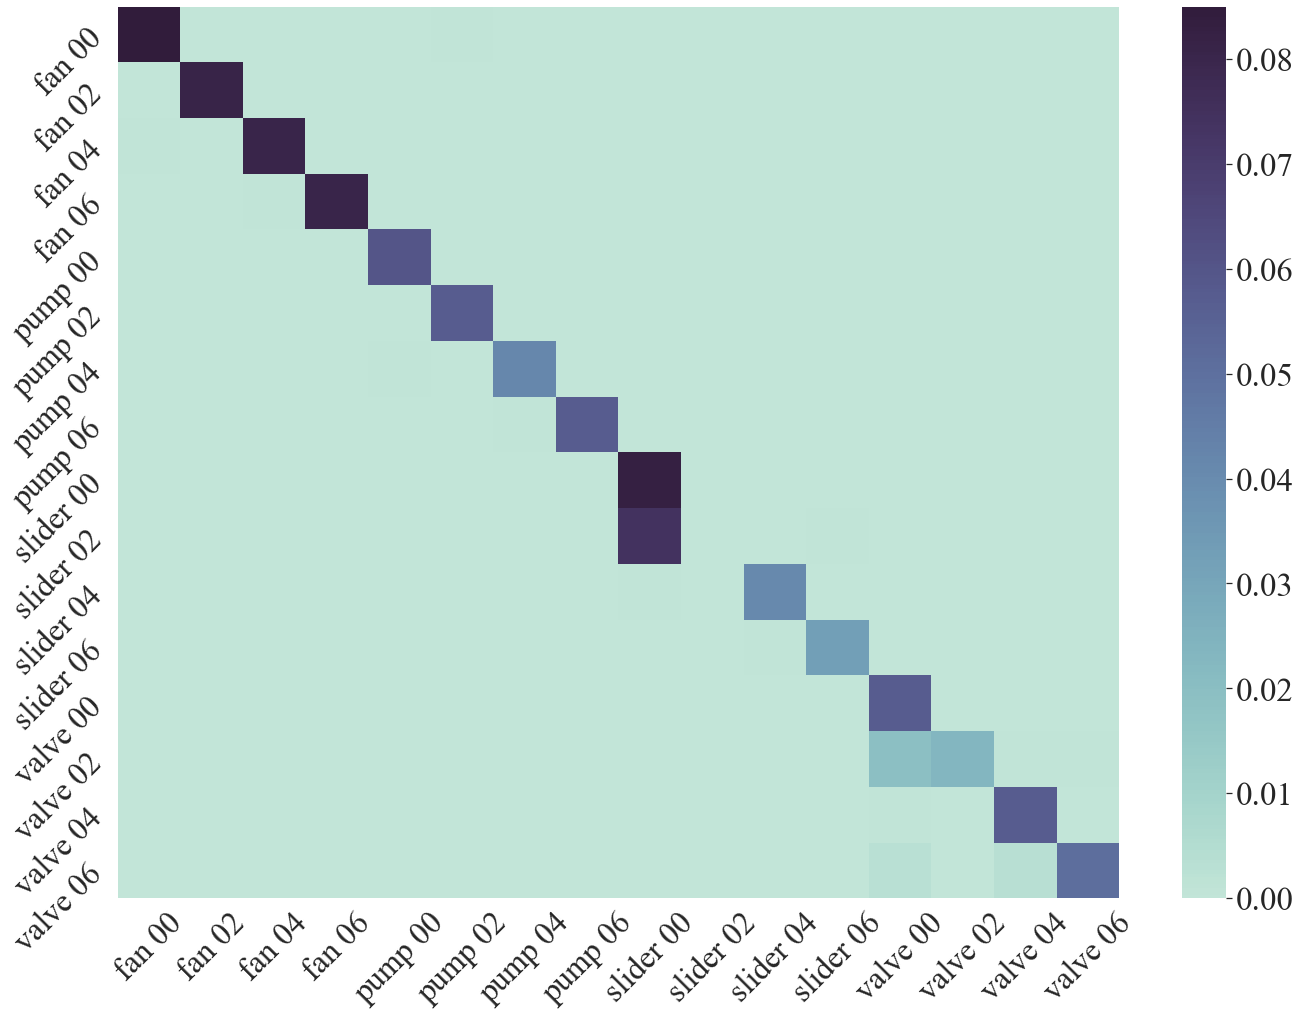

In [28]:
plot_ctx(gt_c, preds_c, "figs/confusion-matrix-CANDE-CP.png")

['fan 00', 'fan 02', 'fan 04', 'fan 06', 'pump 00', 'pump 02', 'pump 04', 'pump 06', 'slider 00', 'slider 02', 'slider 04', 'slider 06', 'valve 00', 'valve 02', 'valve 04', 'valve 06']


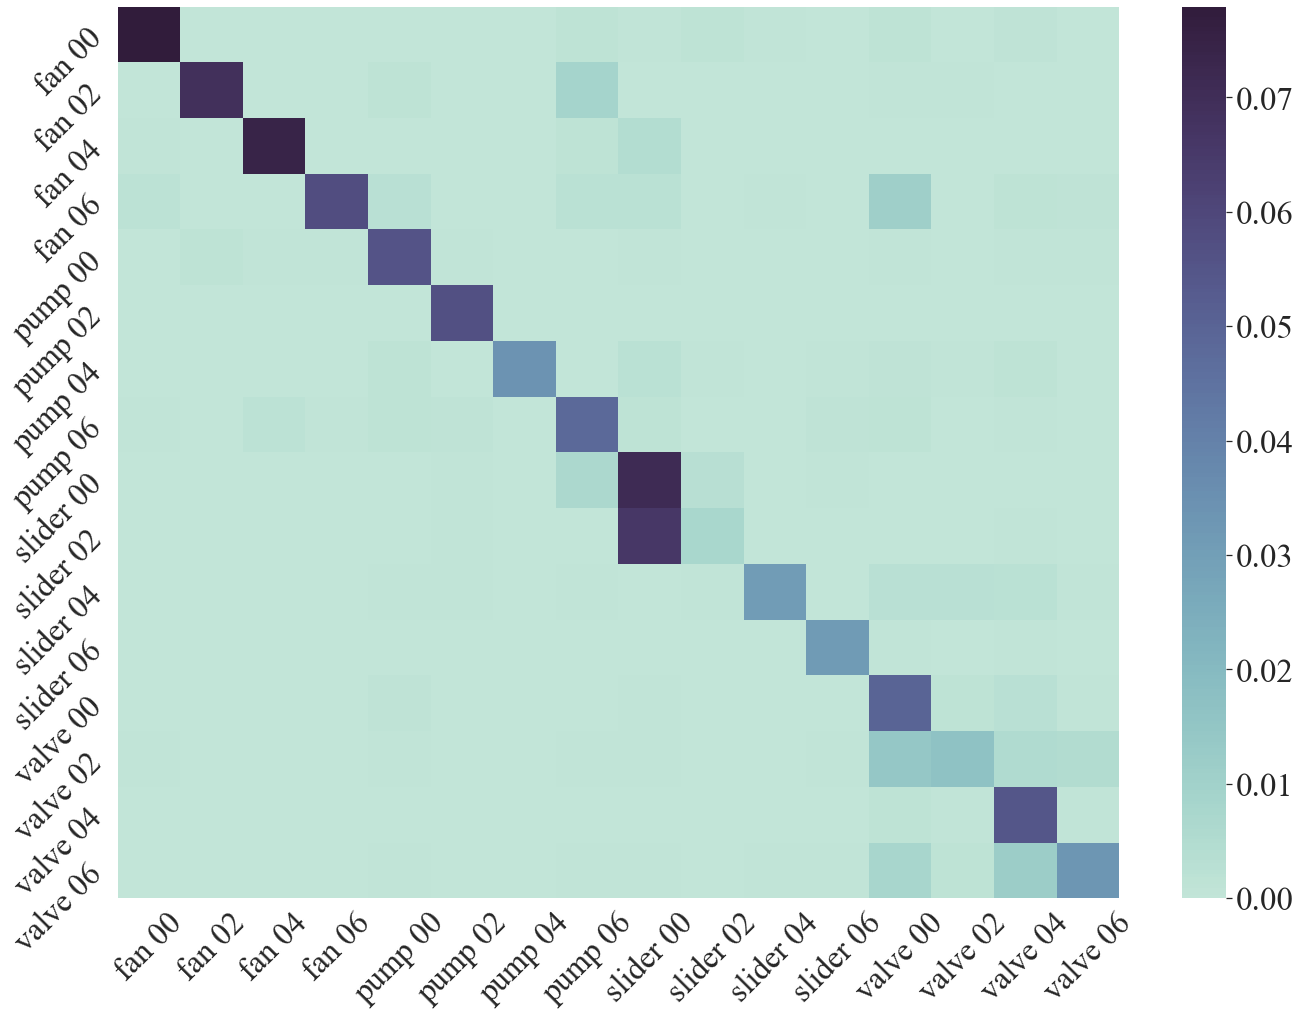

In [29]:
plot_ctx(gt_c, preds_raw_c, "figs/confusion-matrix-CANDE-CP-no-window.png")